<a href="https://colab.research.google.com/github/helenjoy/cv_lab1/blob/main/unit1_CV_CLASS_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
import cv2


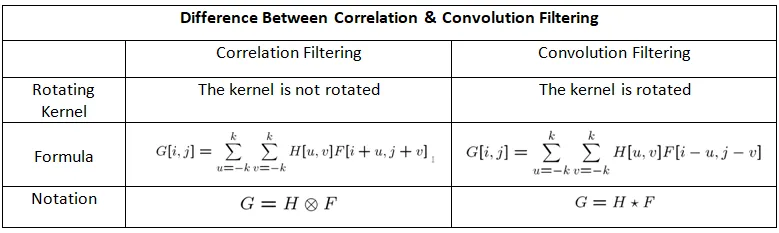

**Convolution_Definition**



---





##Convolution
Definition: Convolution is a mathematical operation that combines two functions to produce a third function. In the context of digital image processing, convolution combines an image with a filter or kernel to produce a modified image.

##How It Works:
**bold text**
Kernel (Filter): A small matrix or array of coefficients (the kernel) is used to modify the image. The kernel is typically much smaller than the image and is used to detect features like edges, blurring, or sharpening.

##Operation:

#Position the Kernel:
Place the kernel over each pixel of the image.
#Multiply and Sum:
For each position, multiply the kernel values with the corresponding pixel values of the image and sum up the results.
#Assign Value:
Assign the resulting value to the corresponding pixel in the output image.
Formula: For a 2D image and a 2D kernel:

(
𝑓
∗
𝑔
)
(
𝑥
,
𝑦
)
=
∑
𝑖
∑
𝑗
𝑓
(
𝑖
,
𝑗
)
⋅
𝑔
(
𝑥
−
𝑖
,
𝑦
−
𝑗
)
(f∗g)(x,y)=
i
∑
​
  
j
∑
​
 f(i,j)⋅g(x−i,y−j)
Where:

𝑓
(
𝑥
,
𝑦
)
f(x,y) is the input image.
𝑔
(
𝑥
,
𝑦
)
g(x,y) is the kernel.
The result is the output image where each pixel value is computed based on the kernel and its surrounding pixels.
##Applications:

Edge Detection: Using kernels like Sobel or Prewitt to find edges in an image.
Blurring: Applying Gaussian kernels to smooth the image.
Sharpening: Using kernels designed to enhance edges and fine details.

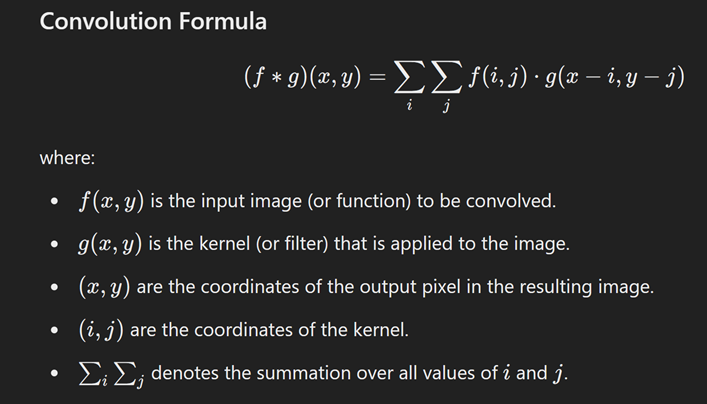

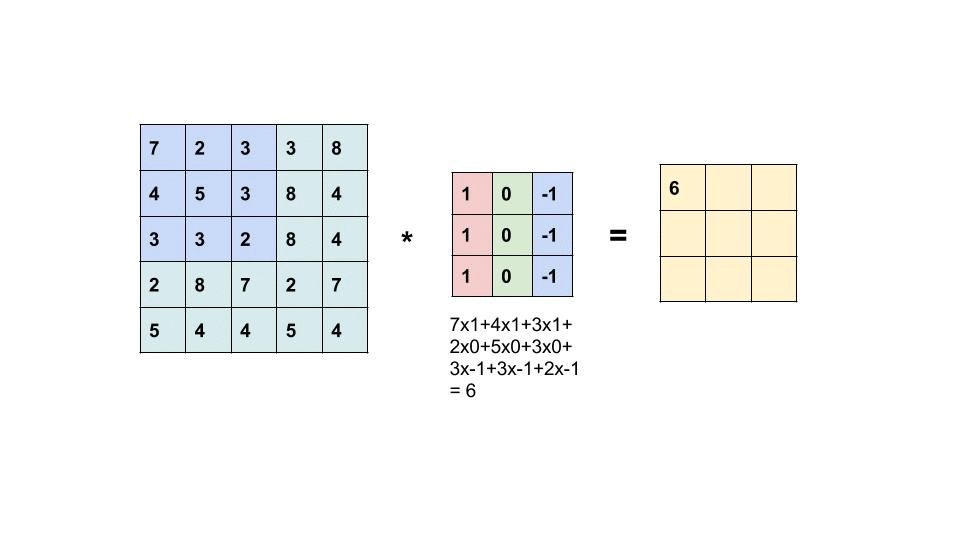

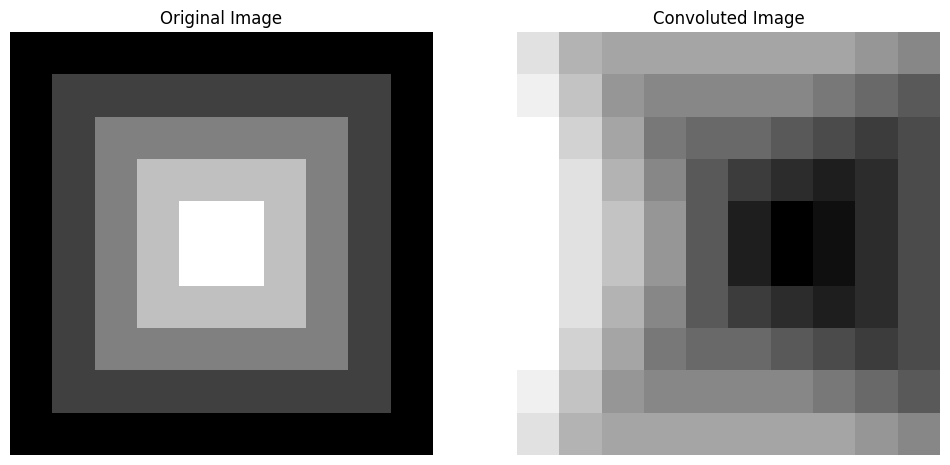

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def convolve2d(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Compute padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Prepare the output image
    output_image = np.zeros_like(image, dtype=np.float32)

    # Perform convolution
    for y in range(image_height):
        for x in range(image_width):
            # Extract the region of interest
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            # Compute the convolution result
            output_image[y, x] = np.sum(region * kernel)

    return output_image

# Create a larger input image (10x10 matrix) for better visualization
image = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 2, 2, 2, 2, 2, 2, 2, 1],
    [1, 2, 3, 3, 3, 3, 3, 3, 2, 1],
    [1, 2, 3, 4, 4, 4, 4, 3, 2, 1],
    [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 4, 4, 4, 3, 2, 1],
    [1, 2, 3, 3, 3, 3, 3, 3, 2, 1],
    [1, 2, 2, 2, 2, 2, 2, 2, 2, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
], dtype=np.float32)

# Example kernel (3x3 matrix) for edge detection
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

# Apply manual convolution
convoluted_image = convolve2d(image, kernel)

# Display the original and convoluted images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray', interpolation='none')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Convoluted image
ax[1].imshow(convoluted_image, cmap='gray', interpolation='none')
ax[1].set_title('Convoluted Image')
ax[1].axis('off')

plt.show()


Convolution
Definition: Convolution is a mathematical operation where a kernel (filter) is applied to an image to produce a modified output. The kernel is flipped (rotated 180 degrees) before being applied.

##Need for Convolution:

#Image Filtering:
Convolution is used to apply various filters to an image, such as blurring, sharpening, and edge detection. These filters are essential for tasks like noise reduction, detail enhancement, and feature extraction.
#Edge Detection:
Convolution with specific kernels (e.g., Sobel, Prewitt) helps in detecting edges by highlighting areas of rapid intensity change. This is crucial for identifying object boundaries and structures within an image.
#Blurring:
Gaussian convolution is used to smooth images, which helps in reducing noise and detail. This is important for applications where noise reduction or image smoothing is needed.
#Sharpening:
Convolution with sharpening kernels enhances the edges and fine details in an image, making features more pronounced and improving image clarity.

# **Correlation**
Definition: Correlation is similar to convolution but differs in the way the kernel is applied to the image. Instead of flipping the kernel, correlation performs the operation directly.

# How It Works:

Kernel: Similar to convolution, a kernel is used to process the image.

# Operation:

Position the Kernel: Place the kernel over each pixel of the image.
Multiply and Sum: For each position, multiply the kernel values with the corresponding pixel values of the image and sum up the results.
Assign Value: Assign the resulting value to the corresponding pixel in the output image.
Formula: For a 2D image and a 2D kernel:
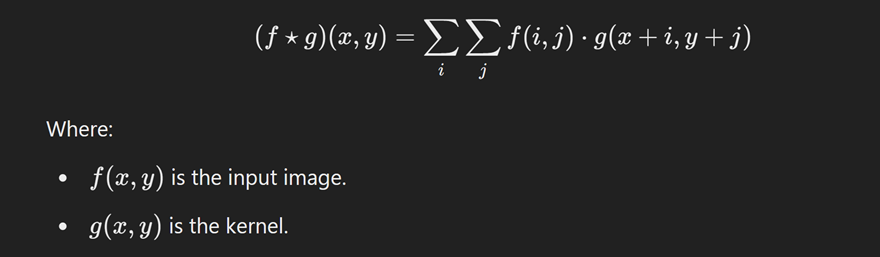


g(x,y) is the kernel.
The result is the output image, where the kernel is directly applied without flipping.
#Applications:

Template Matching: Finding specific patterns or objects in an image by correlating the image with a template.
Image Filtering: Applying various filters to detect or enhance specific features.
Key Differences
Kernel Flipping: In convolution, the kernel is flipped (rotated 180 degrees) before applying it to the image, while in correlation, the kernel is applied as-is.
Mathematical Operation: Convolution involves flipping and then sliding the kernel, whereas correlation directly slides the kernel over the image without flipping.

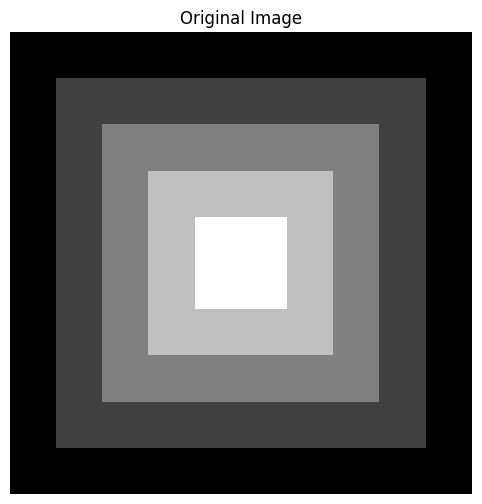

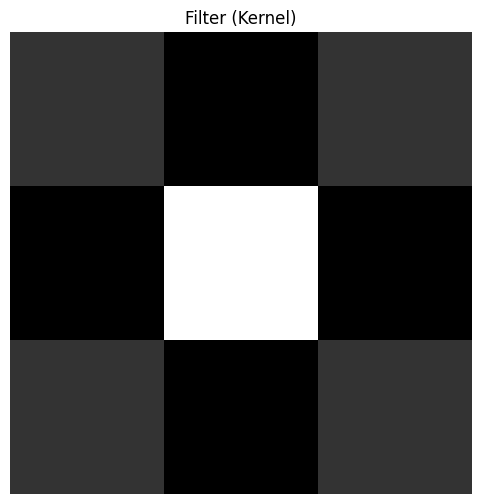

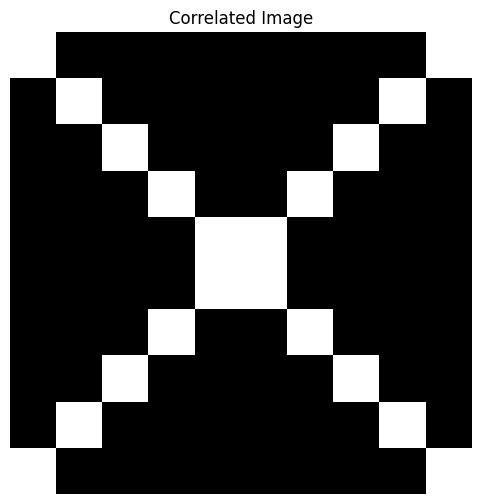

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def correlate2d(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Compute padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Prepare the output image
    output_image = np.zeros_like(image, dtype=np.float32)

    # Perform correlation
    for y in range(image_height):
        for x in range(image_width):
            # Extract the region of interest
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            # Compute the correlation result
            output_image[y, x] = np.sum(region * kernel)

    return output_image

# Create a sample input image (10x10 matrix)
image = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 2, 2, 2, 2, 2, 2, 2, 1],
    [1, 2, 3, 3, 3, 3, 3, 3, 2, 1],
    [1, 2, 3, 4, 4, 4, 4, 3, 2, 1],
    [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 4, 4, 4, 3, 2, 1],
    [1, 2, 3, 3, 3, 3, 3, 3, 2, 1],
    [1, 2, 2, 2, 2, 2, 2, 2, 2, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
], dtype=np.float32)

# Example kernel (3x3 matrix)
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

# Apply manual correlation
correlated_image = correlate2d(image, kernel)

# Plot the images and the filter in separate figures
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray', interpolation='none')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(kernel, cmap='gray', interpolation='none')
plt.title('Filter (Kernel)')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(correlated_image, cmap='gray', interpolation='none')
plt.title('Correlated Image')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def correlate2d(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Compute padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Prepare the output image
    output_image = np.zeros_like(image, dtype=np.float32)

    # Perform correlation
    for y in range(image_height):
        for x in range(image_width):
            # Extract the region of interest
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            # Compute the correlation result
            output_image[y, x] = np.sum(region * kernel)

    return output_image

# Load a sample image from file
image_path = '/all-the-best-lettering-text-black-white-sticker-vector.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Use the same image as the kernel
kernel = image.copy()

# Apply manual correlation
correlated_image = correlate2d(image, kernel)

# Plot the images and the filter in separate figures
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray', interpolation='none')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(kernel, cmap='gray', interpolation='none')
plt.title('Kernel (Same as Image)')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(correlated_image, cmap='gray', interpolation='none')
plt.title('Auto-Correlation of Image')
plt.axis('off')
plt.show()


In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Different color models
##RGB (Red, Green, Blue) Model

The most commonly used model in digital imaging systems.
Each color is represented as a combination of red, green, and blue.
Additive color model: combining these three colors at varying intensities produces the entire spectrum of visible colors.
##CMY and CMYK (Cyan, Magenta, Yellow, Black) Model

Subtractive color model primarily used in color printing.
CMY works by subtracting varying amounts of cyan, magenta, and yellow from white light.
K (black) is added to compensate for imperfections in the combination of cyan, magenta, and yellow.
##HIS (Hue, Intensity, Saturation) Model

Based on how humans perceive colors, making it more intuitive for tasks like image enhancement and object recognition.
Hue: represents the type of color (e.g., red, blue).
Saturation: represents the purity or vividness of the color.
Intensity: represents the brightness level.
##YIQ Model

Used in NTSC (National Television System Committee) broadcasting systems.
Y is the luminance (brightness) component, while I and Q represent chrominance (color) components.
This separation of luminance and chrominance allows for backward compatibility with black-and-white television systems.
##YUV and YCbCr Models

Used in video compression and television broadcasting.
Y represents luminance, while U and V (in YUV) or Cb and Cr (in YCbCr) represent chrominance components.
The YCbCr model is widely used in digital video standards such as JPEG and MPEG compression.
##CIELAB Model

Perceptually uniform color model developed by the International Commission on Illumination (CIE).
Represents color in a way that closely matches human vision.
L represents lightness, while a and b represent chromaticity components.

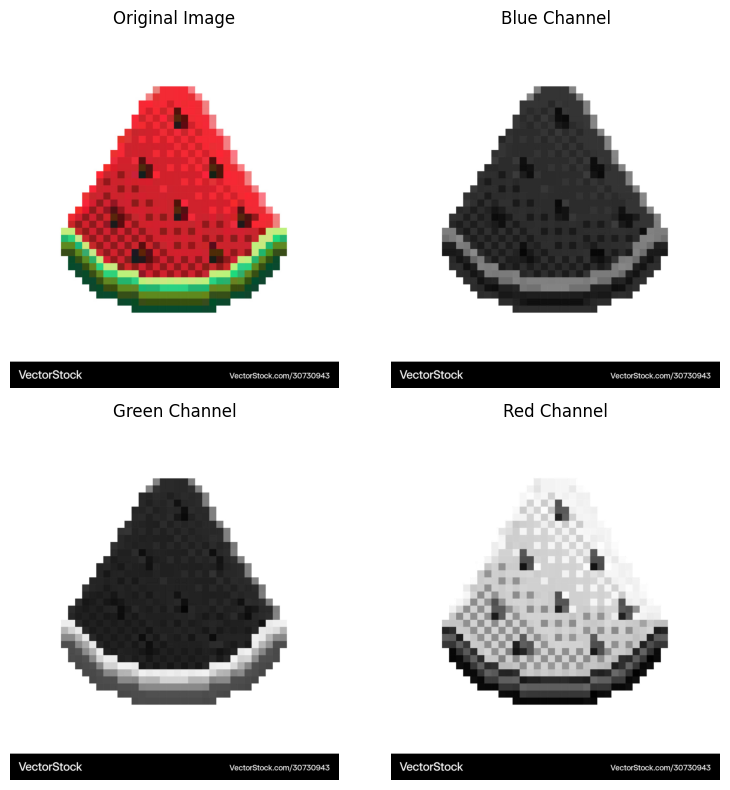

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/sample for cv/pixel-watermelon-icon-32x32-vector-30730943.jpg')
B, G, R = cv2.split(image)

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Display the images on the axes
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(B, cmap='gray')
axes[0, 1].set_title('Blue Channel')
axes[0, 1].axis('off')

axes[1, 0].imshow(G, cmap='gray')
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

axes[1, 1].imshow(R, cmap='gray')
axes[1, 1].set_title('Red Channel')
axes[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

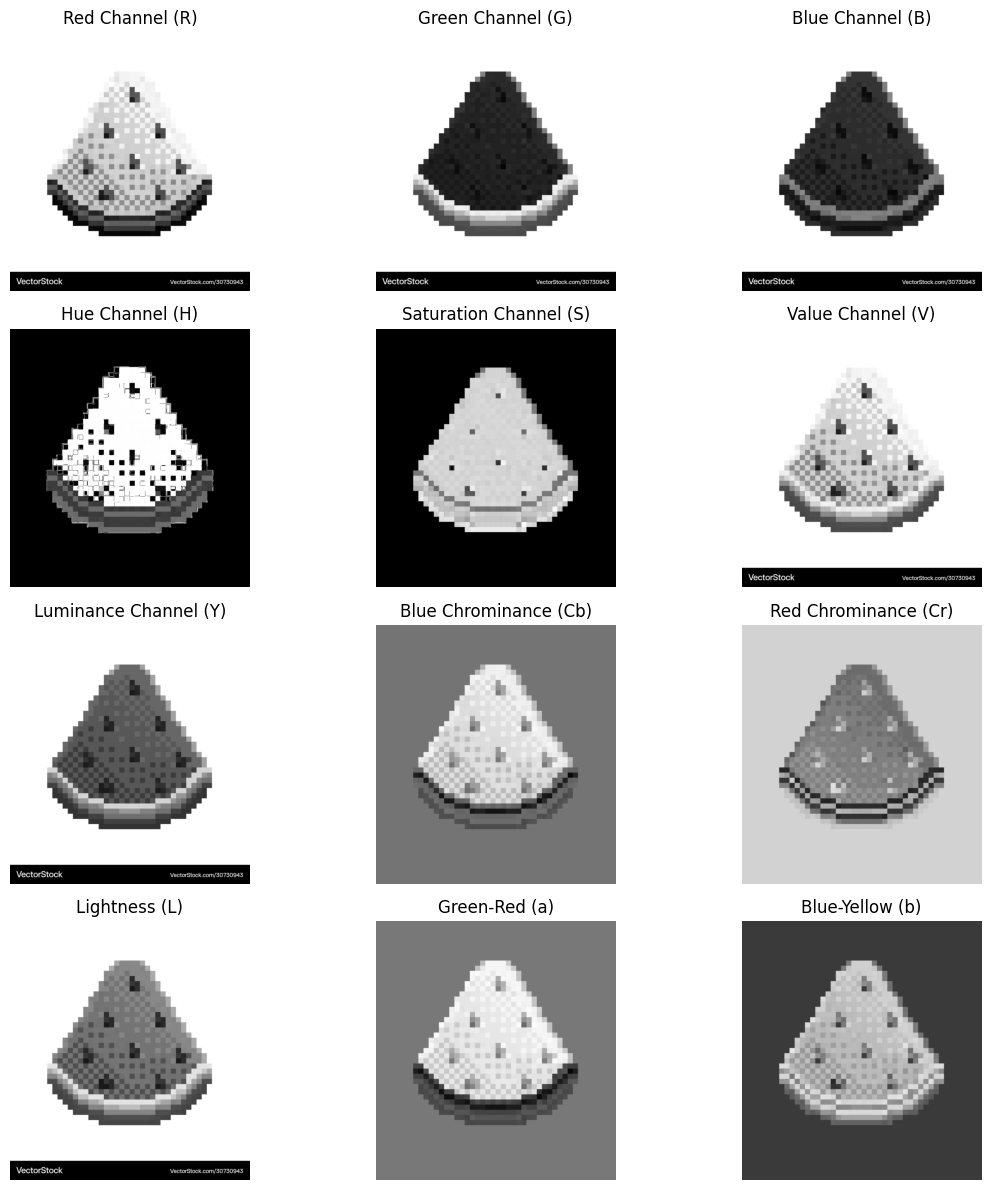

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/sample for cv/pixel-watermelon-icon-32x32-vector-30730943.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Convert to different color spaces
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert BGR to HSV
image_ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)  # Convert BGR to YCbCr
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)  # Convert BGR to Lab

# Split the channels for each color space
# RGB Channels
R, G, B = cv2.split(image_rgb)
# HSV Channels
H, S, V = cv2.split(image_hsv)
# YCbCr Channels
Y, Cb, Cr = cv2.split(image_ycbcr)
# Lab Channels
L, a, b = cv2.split(image_lab)

# Plot the images with separated components
plt.figure(figsize=(12, 12))

# Display RGB components
plt.subplot(4, 3, 1)
plt.imshow(R, cmap='gray')
plt.title('Red Channel (R)')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(G, cmap='gray')
plt.title('Green Channel (G)')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(B, cmap='gray')
plt.title('Blue Channel (B)')
plt.axis('off')

# Display HSV components
plt.subplot(4, 3, 4)
plt.imshow(H, cmap='gray')
plt.title('Hue Channel (H)')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(S, cmap='gray')
plt.title('Saturation Channel (S)')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(V, cmap='gray')
plt.title('Value Channel (V)')
plt.axis('off')

# Display YCbCr components
plt.subplot(4, 3, 7)
plt.imshow(Y, cmap='gray')
plt.title('Luminance Channel (Y)')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(Cb, cmap='gray')
plt.title('Blue Chrominance (Cb)')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(Cr, cmap='gray')
plt.title('Red Chrominance (Cr)')
plt.axis('off')

# Display Lab components
plt.subplot(4, 3, 10)
plt.imshow(L, cmap='gray')
plt.title('Lightness (L)')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(a, cmap='gray')
plt.title('Green-Red (a)')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(b, cmap='gray')
plt.title('Blue-Yellow (b)')
plt.axis('off')

plt.tight_layout()
plt.show()


##Geometric transformations
It is used to modify the spatial arrangement of pixels in an image
Geometric transformations of digital images consist of two basic operations

Spatial transformation of coordinates.

2. Intensity interpolation that assigns intensity values to the spatially transformed pixels.


Numpy and open CV Scipy,libraries are used to perform geometric operation in digital images.

cv2.resize() for scaling, cv2.warpAffine() for affine transformations, and cv2.warpPerspective() for projective transformations.

Determine the operations like translation, rotation, scaling, shearing, or perspective transformation to be performed.


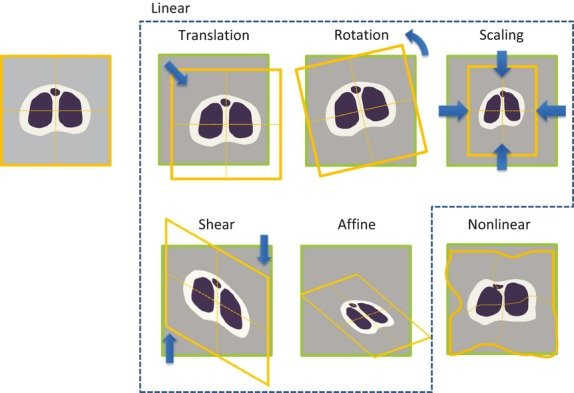


1**.TRANSLATION**

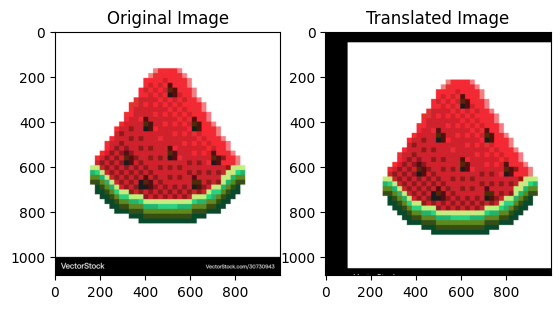

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/drive/MyDrive/sample for cv/pixel-watermelon-icon-32x32-vector-30730943.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Check if the image was successfully loaded
if image is None:
    print("Error loading image")
else:
    # Convert from BGR (OpenCV's default color format) to RGB for correct display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Translation matrix (move by 100 pixels to the right and 50 pixels down)
    tx, ty = 100, 50
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Apply translation
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

    # Convert the translated image to RGB for display
    translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

    # Display the original and translated images using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(translated_image_rgb)
    plt.title('Translated Image')

    plt.show()


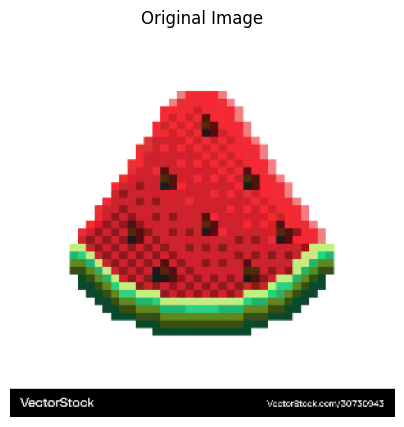

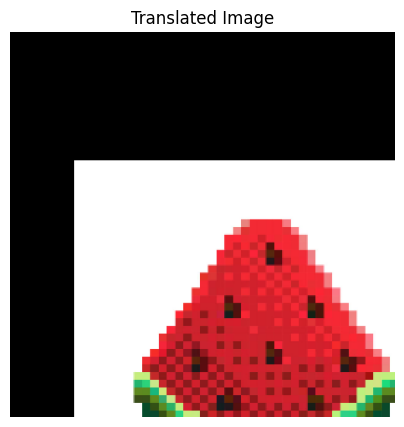

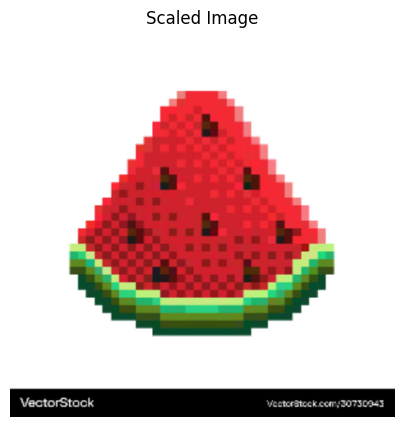

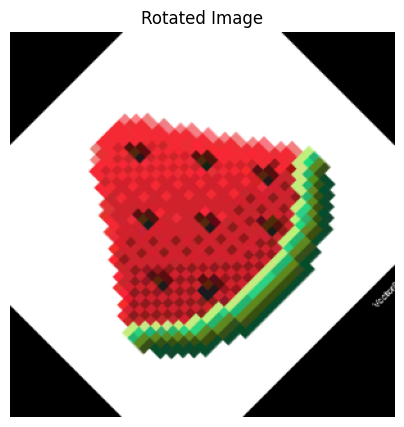

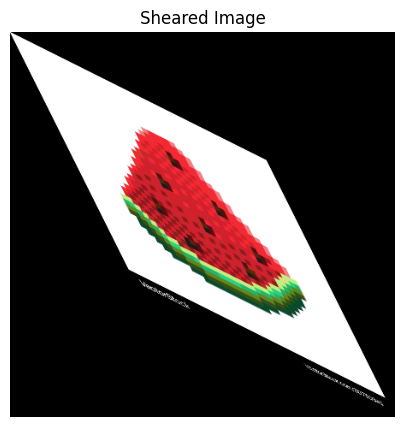

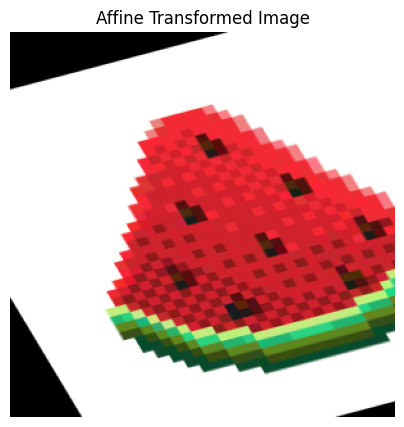

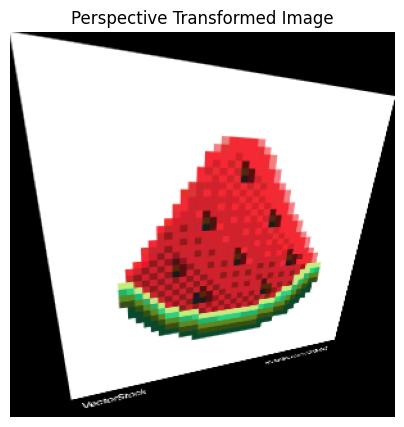

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images using Matplotlib
def display_image(title, image):
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load image
image = cv2.imread('/content/drive/MyDrive/sample for cv/pixel-watermelon-icon-32x32-vector-30730943.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Resize image for display purposes
image = cv2.resize(image, (300, 300))

display_image("Original Image", image)

# 1. Translation
rows, cols = image.shape[:2]
M_translate = np.float32([[1, 0, 50], [0, 1, 100]]) # Translation matrix (shift by 50px right, 100px down)
translated_image = cv2.warpAffine(image, M_translate, (cols, rows))

display_image("Translated Image", translated_image)

# 2. Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR) # Scale by 1.5x

display_image("Scaled Image", scaled_image)

# 3. Rotation
M_rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1) # Rotate 45 degrees
rotated_image = cv2.warpAffine(image, M_rotate, (cols, rows))

display_image("Rotated Image", rotated_image)

# 4. Shear
M_shear = np.float32([[1, 0.5, 0], [0.5, 1, 0]]) # Shear matrix
sheared_image = cv2.warpAffine(image, M_shear, (int(cols * 1.5), int(rows * 1.5)))

display_image("Sheared Image", sheared_image)

# 5. Affine Transformation
# Define points for affine transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]]) # Input triangle
pts2 = np.float32([[10, 100], [200, 50], [100, 250]]) # Output triangle

M_affine = cv2.getAffineTransform(pts1, pts2) # Affine transformation matrix
affine_image = cv2.warpAffine(image, M_affine, (cols, rows))

display_image("Affine Transformed Image", affine_image)

# 6. Perspective Transformation
pts1_perspective = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]]) # Four corners of the image
pts2_perspective = np.float32([[0, 0], [300, 50], [50, 300], [250, 250]]) # New corner points for perspective

M_perspective = cv2.getPerspectiveTransform(pts1_perspective, pts2_perspective)
perspective_image = cv2.warpPerspective(image, M_perspective, (cols, rows))

display_image("Perspective Transformed Image", perspective_image)
